In [27]:
from PIL import Image
from numpy import *
import sklearn
import skimage
import numpy as np
import sys
from matplotlib import pyplot as plt
from skimage import data, io
from scipy import signal
from scipy.ndimage import median_filter, gaussian_filter, prewitt

from utils import read_img_mono

# Part 1: Warmup with convolution and correlation 

## 1.1 Denoising

In [2]:
#show an image in a cell
def show_img(img_array):
    io.imshow(img_array)
    print(f'Shape: {img_array.shape}')
    io.show()

Shape: (453, 680)


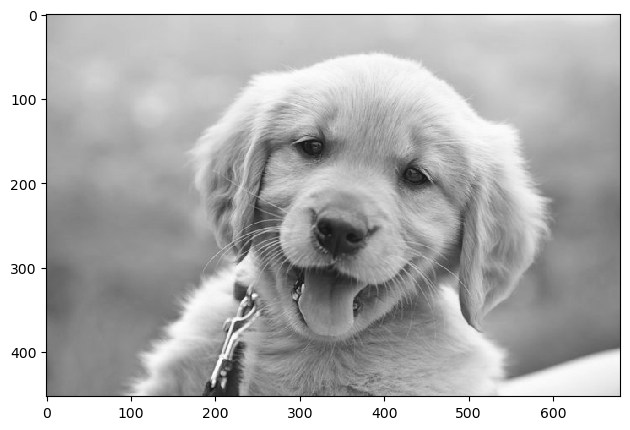

In [3]:
img = array(Image.open('res/puppy.jpg').convert(mode='L')) #to obtain grayscale image from RGB, need this since all operations need grayscale input
show_img(img)

Shape: (453, 680)


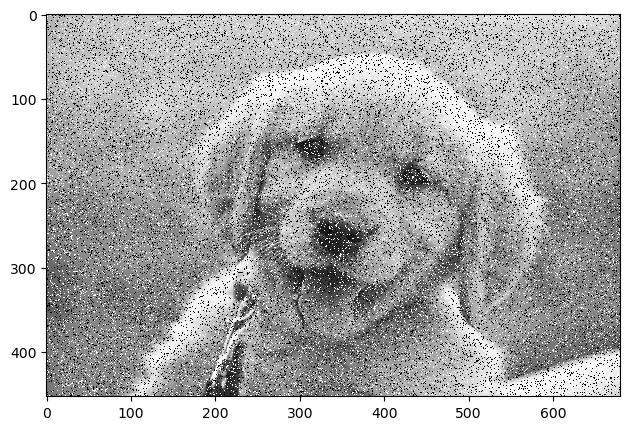

In [4]:
#add noise to the image
img_sp_noise = skimage.util.random_noise(img, mode = 's&p', seed = None, clip = True, amount = 0.18)
show_img(img_sp_noise)

Shape: (453, 680)


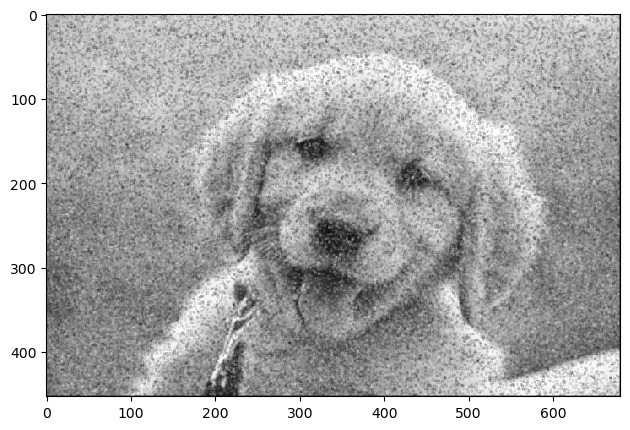

In [5]:
# make 3*3 box filter and convolve it with image for denoising
def box_filter(dim):
    return np.ones((dim, dim)) * 1 / dim ** 2

img_denoised_box_conv = signal.convolve2d(
    img_sp_noise, 
    box_filter(3), 
    mode="same")
#.astype(np.uint8)

show_img(img_denoised_box_conv)

The bigger the average filter, the less noise but the more blur you get.

Shape: (453, 680)


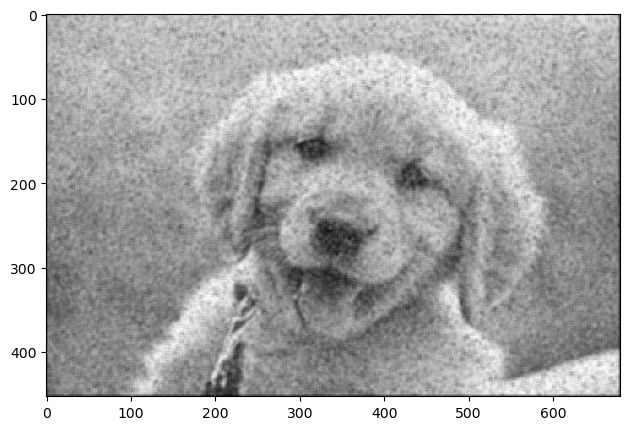

In [6]:
# Average filter

img_denoised_box_conv = signal.correlate2d(
    img_sp_noise, 
    box_filter(5), 
    mode="same")
#.astype(np.uint8)

show_img(img_denoised_box_conv)

Shape: (453, 680)


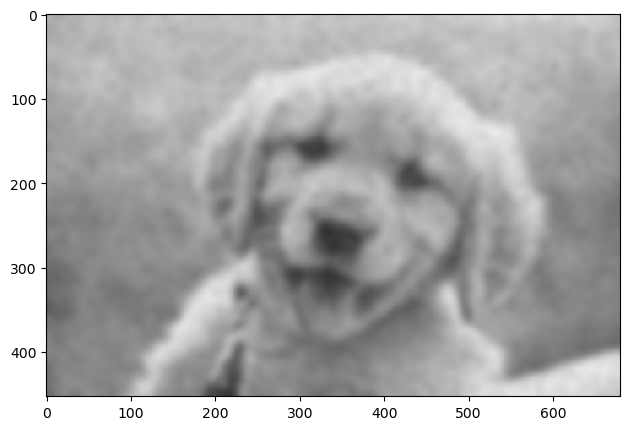

In [7]:
# Gaussian Smoothing on the image
smoothed_gaussian = gaussian_filter(img_sp_noise, sigma = 5)
show_img(smoothed_gaussian)

Shape: (453, 680)


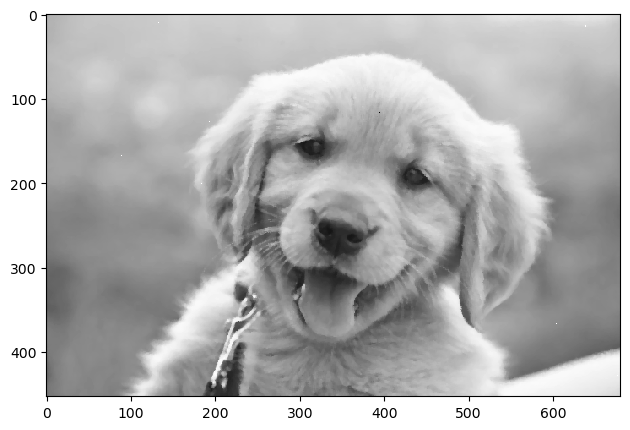

In [8]:
# Median Smoothing on the image
smoothed_median = median_filter(img_sp_noise, size = (4, 4))
show_img(smoothed_median)

### Points to explore:

1. Vary the size of the box - the bigger the box, the more denoising but you increase the blurriness
2. Yes you get the same image. Why? The filter is symmetric so the output doesn't change no matter the order
3. Median filter works the best.

## 1.2 Edge Detection

In [9]:
# horizontal line detection
simple_edge_filter = np.array([[-1, 0, 1]]).T

In [10]:
simple_edge_filter.shape

(3, 1)

Horizontal edge detection using convolution.

Shape: (453, 680)


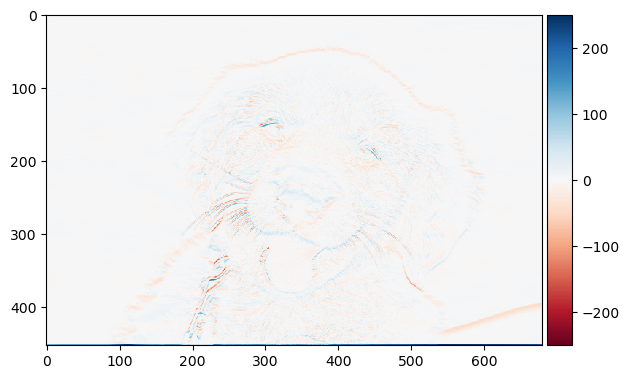

In [11]:
img_simple_edge_detect = signal.convolve2d(
    img, 
    simple_edge_filter, 
    mode="same")
show_img(img_simple_edge_detect)

Let's try with correlation instead

Shape: (453, 680)


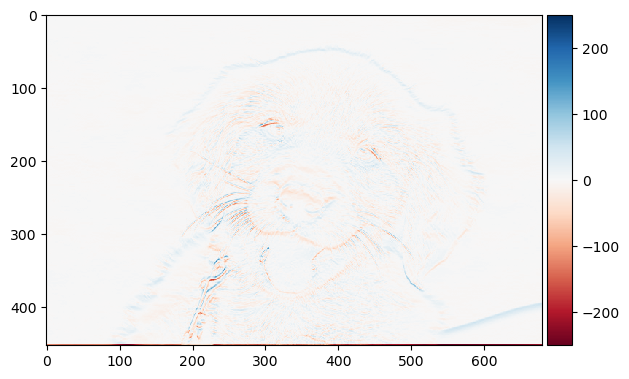

In [14]:
img_simple_edge_detect = signal.correlate2d(
    img, 
    simple_edge_filter, 
    mode="same")
show_img(img_simple_edge_detect)

They are not the same becaus the filter $[-1, 0, 1]$ is not symmetric anymore.

Shape: (453, 680)


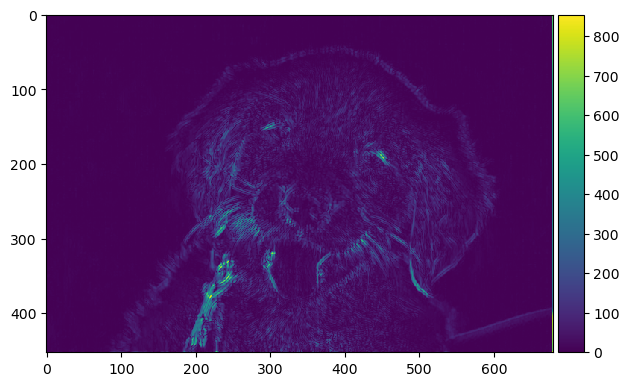

In [17]:
def prewitt_filtering(img):
    # get the Prewitt filter
    x_direction = [[1, 0, -1], [1, 0, -1], [1, 0, -1]]
    y_direction = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
    
    img_prewitt_detect_x = signal.convolve2d(
    img, 
    x_direction, 
    mode="same")
    
    img_prewitt_detect_y = signal.convolve2d(
        img_prewitt_detect_x, 
        y_direction, 
        mode="same")
    
    operator = lambda a, b : np.sqrt(a**2 + b**2)
    
    vprewitt_operator = np.vectorize(prewitt_operator)

    img_prewitt = vprewitt_operator(img_prewitt_detect_x, img_prewitt_detect_y)
    
    return img_prewitt
show_img(prewitt_filtering(img))

Investigating the impact of using a filter before detecting the edges.

# Part 2: Understanding Convolution

In [ ]:
'''
- Just some eng stuff, you could figure it out but no real
def convolution(img_filter, image, edge_handling='kernel'):
    if edge_handling = 'kernel':
    

def main(conv_func, img, f):
    img = conv_func(img_filter = f, image = img)
'''    

# Part 3: Line Detection

Shape: (453, 680)


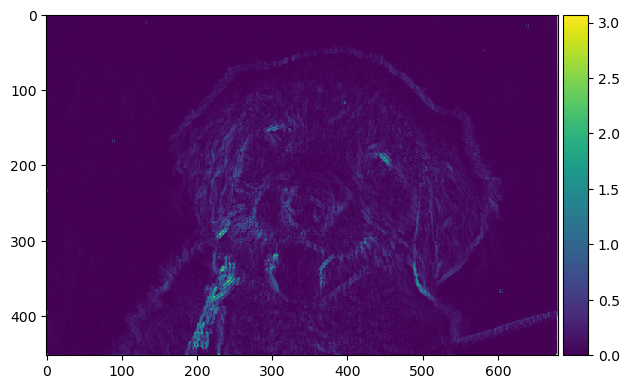

In [21]:
# using the Prewitt's kernels to detect edges
show_img(prewitt_filtering(smoothed_median))

Shape: (486, 842)


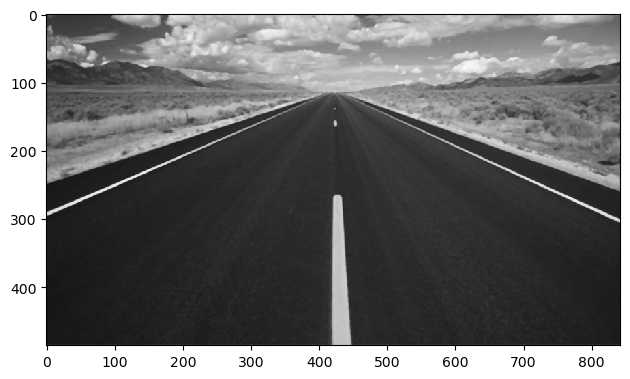

In [39]:
# find the edges in the image
#1. get rid of noise
img_high = array(Image.open('res/highway.jpg').convert(mode='L'))

smoothed_median_high = median_filter(img_high, size = (4, 4))

show_img(smoothed_median_high)

Shape: (486, 842)


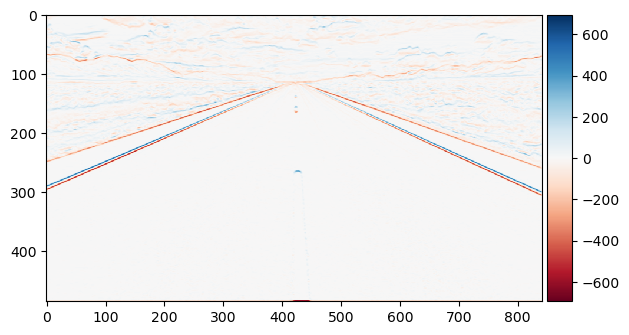

In [40]:
My = [[1, 1, 1], [0, 0, 0], [-1, -1, -1]]
dMy = signal.convolve2d(smoothed_median_high, My, mode="same")

show_img(dMy)

In [51]:
# heuristic edge detection
edges = dMy.copy()
edges[edges < 110] = 0

In [52]:
edges

array([[210, 315, 320, ..., 348, 346, 230],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [42]:
x = [1, 3, 5, 2, 6, 1, 2]
x[x < 3] = 0
print(x)

TypeError: '<' not supported between instances of 'list' and 'int'

In [29]:
img_high.shape

(486, 842)